<a href="https://colab.research.google.com/github/Atta-UR/Image_Classification_on_Cifar10_Dataset/blob/main/Image_Classification_Using_Cifar10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries Including the Dataset

In [8]:
# Importing TensorFlow and Keras libraries for building and training neural networks
import tensorflow as tf
from tensorflow.keras.datasets import cifar10  # CIFAR-10 dataset for image classification
from tensorflow.keras.models import Sequential  # Sequential model for stacking layers linearly
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Layers for CNN construction
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from tensorflow.keras.layers import Input  # Import the Input layer

# Libraries for data visualization and numerical operations
import matplotlib.pyplot as plt  # Used to visualize training progress and augmented images
import numpy as np  # Essential for numerical operations and array manipulation


# Load and Preprocess the CIFAR-10 Data

In [2]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Data Augmentation

In [3]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

# Visualize Sample Augmented Images

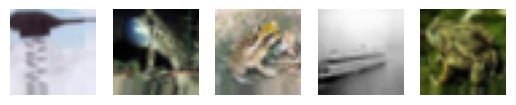

In [4]:
# Display augmented images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=5):
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.show()
    break  # Display one batch and stop

# Define the CNN Model

In [9]:
# Define the CNN model architecture with an Input layer
model = Sequential([
    Input(shape=(32, 32, 3)),               # Explicitly define the input shape
    Conv2D(32, (3, 3), activation='relu'),   # First convolutional layer
    MaxPooling2D((2, 2)),                   # First max pooling layer
    Dropout(0.25),                          # Dropout layer to prevent overfitting

    Conv2D(64, (3, 3), activation='relu'),   # Second convolutional layer
    MaxPooling2D((2, 2)),                   # Second max pooling layer
    Dropout(0.25),                          # Dropout layer to prevent overfitting

    Conv2D(128, (3, 3), activation='relu'),  # Third convolutional layer
    Flatten(),                               # Flattening layer

    Dense(128, activation='relu'),           # Fully connected dense layer
    Dropout(0.5),                            # Dropout for regularization
    Dense(10, activation='softmax')          # Output layer for 10 classes
])

# Compiling the Model

In [10]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [11]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(x_test, y_test)
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.2481 - loss: 1.9911 - val_accuracy: 0.4984 - val_loss: 1.4005
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.4364 - loss: 1.5557 - val_accuracy: 0.5385 - val_loss: 1.2639
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.4937 - loss: 1.4177 - val_accuracy: 0.5907 - val_loss: 1.1636
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5281 - loss: 1.3288 - val_accuracy: 0.5910 - val_loss: 1.1579
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5513 - loss: 1.2696 - val_accuracy: 0.6262 - val_loss: 1.0427
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.5681 - loss: 1.2266 - val_accuracy: 0.6416 - val_loss: 1.0089
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.5869 - loss: 1.1744 - val_accuracy: 0.6579 - val_loss: 0.9812
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.5984 - loss: 1.1562 - val_accurac

# Visualize Training History

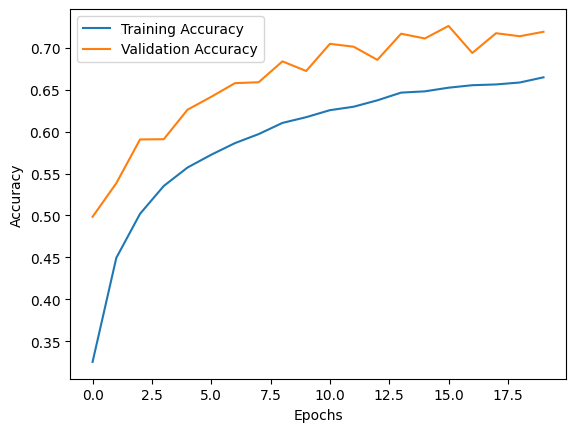

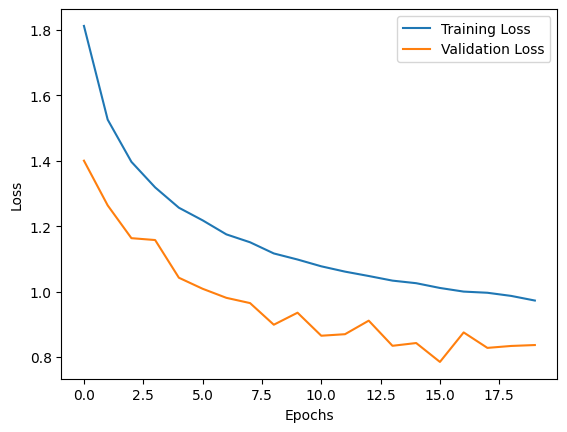

In [12]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
